# 0. Introdução

**Trabalho Pré-Processamento**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Selecionar uma base de dados com dados faltantes
- Executar etapas do pré-processamento:
- - Limpeza
- - Transformação
- - Discretização
- Aplicar algum tipo de visualização dos dados


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [2]:
from datetime import datetime
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sex import SEX

# 1. Dados

Para realização das tarefas envolvidas no pré-processamento utilizou-se o arquivo **COVID19_open_line_list.csv** contém dados de pesoas que foram infectadas com o virus e sua localização 

O objetivo da pesquisa foi estudar qual a relação das pessoas que possuem corona virus com suas informações pessoais. As informações coletadas incluíam **idade**, **sexo (masculino = 0, feminino = 1)**, **data inicio sintomas**, **data entrada no hospital** e **data de confirmação da doença**.

## 1.1 Informações sobre os dados:

#### Atributos:
- Idade: Idade (0 - Jovens até 15 anos, 1 - Adultos entre 15 e 64 anos , 2 - Idosos acima de adultos)
- Sexo: Sexo (0 - masculino / 1 - feminino)
- Inicio Sintomas: Data de inicio do sintomas
- Entrada Hospital: Data de entrada do hospital
- Confirmacao: Data de confirmação do virus

#### Classe:
- Trips: Viagens

## 1.2 Carregamento do arquivo

In [3]:
arq_corona = './dataset/COVID19_open_line_list.csv'

In [4]:
# Carregando os dados apenas com as colunas desejadas
corona = pd.read_csv(
    arq_corona,
    usecols=['ID', 'age', 'sex', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation'],
    )
corona.columns = ['id', 'idade', 'sexo', 'inicio_sintomas','entrada_hospital', 'data_confirmacao']

In [5]:
corona.head()

,id,idade,sexo,inicio_sintomas,entrada_hospital,data_confirmacao
0,1.0,30,male,18.01.2020,20.01.2020,22.01.2020
1,2.0,47,male,10.01.2020,21.01.2020,23.01.2020
2,3.0,49,male,15.01.2020,20.01.2020,23.01.2020
3,4.0,47,female,17.01.2020,20.01.2020,23.01.2020
4,5.0,50,female,10.01.2020,21.01.2020,23.01.2020


In [6]:
corona.describe()

,id
count,13173.000000
mean,6769.250436
std,3920.886020
min,1.000000
25%,3351.000000
50%,6865.000000
75%,10180.000000
max,13479.000000


# 2. Aplicação de algoritmos

#### Problemas idenficados:
- 1. Dados faltantes representados por "NaN" ou em branco
- 2. Dados fora de uma normalização

In [7]:
# # Exibindo os dados de cada coluna separadamente
# ser_aggCol=corona.aggregate(lambda x: [x.tolist()], axis=0).map(lambda x:x[0])
# print('ser_aggCol (collapse each column to a list)',ser_aggCol, sep='\n', end='\n\n\n')

## 2.1 Removendo registros vazios

In [8]:
corona = corona.drop(corona[pd.isna(corona.id)].index)

## 2.2 Processando a coluna referente ao sexo

In [9]:
corona.sexo.unique()

array(['male', 'female', nan, 'Female', 'Male'], dtype=object)

In [10]:
# Removendo sexos diferentes dos esperados
corona.sexo = SEX.process_data(corona)
corona.sexo.unique()

array(['0', '1'], dtype=object)

## 2.3 Processando a idade

In [11]:
# Removendo idades invalidas e add a media nos valores nulos

validAgeValues = []
for age in corona.idade:
    if pd.isna(age):
        validAgeValues.append(age)
    if not pd.isna(age) and not "-" in str(age) and not "." in str(age)  and 0 < int(age) < 99:
        validAgeValues.append(age)

corona = corona[corona['idade'].isin(validAgeValues)]
corona.idade = corona.idade.fillna(corona.idade.mode()[0])
corona.idade.unique()

array(['30', '47', '49', '50', '33', '42', '59', '39', '38', '45', '37',
       '32', '18', '56', '44', '65', '21', '41', '70', '43', '31', '24',
       '40', '66', '36', '10', '63', '78', '76', '48', '62', '46', '34',
       '72', '20', '54', '2', '29', '61', '51', '80', '69', '28', '55',
       '68', '57', '35', '27', '52', '22', '23', '88', '19', '60', '58',
       '53', '25', '26', '64', '11', '73', '74', '7', '82', '67', '15',
       '16', '5', '3', '4', '71', '77', '75', '94', '81', '17', '8', '9',
       '12', '83', '84', '1', '79', '87', '96'], dtype=object)

In [12]:
for i, row in corona.iterrows():
  if int(row.idade) < 15:
    #   jovens
    ifor_val = "0"
  if 15 <= int(row.idade) <= 64:
    #   adultos
    ifor_val = "1"
  if 64 < int(row.idade) < 100:
    #   idosos
    ifor_val = "2"
  corona.at[i,'idade'] = ifor_val
  

In [13]:
corona.idade.unique()

array(['1', '2', '0'], dtype=object)

## 2.3 Processando as datas

## 2.3.1 Processando a data de inicio dos sintomas

In [14]:
validDates = []
for i, row in corona.iterrows():
    if pd.isna(row.inicio_sintomas):
        validDates.append(row.inicio_sintomas)
    if len(str(row.inicio_sintomas)) == 10:
        parsedDate = row.inicio_sintomas.split('.')
        if int(parsedDate[1]) > 12:
            formatedDate = parsedDate[2] + '-' + parsedDate[0] + '-' + parsedDate[1]
        else:
            formatedDate = parsedDate[2] + '-' + parsedDate[1] + '-' + parsedDate[0]
        date = datetime.strptime(formatedDate, "%Y-%m-%d")
        corona.at[i,'inicio_sintomas'] = date.timestamp()    
        validDates.append(date.timestamp())

corona = corona[corona['inicio_sintomas'].isin(validDates)]
corona.inicio_sintomas = corona.inicio_sintomas.fillna(corona.inicio_sintomas.mean())
corona.inicio_sintomas.unique()

array([1.57931640e+09, 1.57862520e+09, 1.57905720e+09, 1.57923000e+09,
       1.57999603e+09, 1.57957560e+09, 1.57940280e+09, 1.57966200e+09,
       1.57845240e+09, 1.57897080e+09, 1.57853880e+09, 1.57914360e+09,
       1.57948920e+09, 1.57810680e+09, 1.57802040e+09, 1.57784760e+09,
       1.57793400e+09, 1.57888440e+09, 1.57974840e+09, 1.57758840e+09,
       1.57871160e+09, 1.57879800e+09, 1.57983480e+09, 1.57819320e+09,
       1.57992120e+09, 1.58000760e+09, 1.58009400e+09, 1.58018040e+09,
       1.58035320e+09, 1.58026680e+09, 1.58052600e+09, 1.58043960e+09,
       1.58061240e+09, 1.58078520e+09, 1.58069880e+09, 1.58104440e+09,
       1.58087160e+09, 1.58095800e+09, 1.58130360e+09, 1.58113080e+09,
       1.58164920e+09, 1.58139000e+09, 1.58147640e+09, 1.58121720e+09,
       1.58182200e+09, 1.58216760e+09, 1.58156280e+09, 1.58199480e+09,
       1.58190840e+09, 1.58251320e+09, 1.58259960e+09, 1.58242680e+09])

## 2.3.1 Processando a data de entrada no hospital

In [15]:
validDates = []
for i, row in corona.iterrows():
    if pd.isna(row.entrada_hospital):
        validDates.append(row.entrada_hospital)
    if len(str(row.entrada_hospital)) == 10:
        parsedDate = row.entrada_hospital.split('.')
        if int(parsedDate[1]) > 12:
            formatedDate = parsedDate[2] + '-' + parsedDate[0] + '-' + parsedDate[1]
        else:
            formatedDate = parsedDate[2] + '-' + parsedDate[1] + '-' + parsedDate[0]
        date = datetime.strptime(formatedDate, "%Y-%m-%d")
        corona.at[i,'entrada_hospital'] = date.timestamp()    
        validDates.append(date.timestamp())

corona = corona[corona['entrada_hospital'].isin(validDates)]
corona.entrada_hospital = corona.entrada_hospital.fillna(corona.entrada_hospital.mean())
corona.entrada_hospital.unique()

array([1.57948920e+09, 1.57957560e+09, 1.58029423e+09, 1.57983480e+09,
       1.57966200e+09, 1.57845240e+09, 1.57897080e+09, 1.57940280e+09,
       1.57905720e+09, 1.57862520e+09, 1.57871160e+09, 1.57923000e+09,
       1.57974840e+09, 1.57931640e+09, 1.57879800e+09, 1.57888440e+09,
       1.57914360e+09, 1.57810680e+09, 1.58018040e+09, 1.57992120e+09,
       1.58000760e+09, 1.58009400e+09, 1.58026680e+09, 1.58035320e+09,
       1.58043960e+09, 1.58052600e+09, 1.58061240e+09, 1.58069880e+09,
       1.58078520e+09, 1.58087160e+09, 1.58095800e+09, 1.58104440e+09,
       1.58113080e+09, 1.58139000e+09, 1.58147640e+09, 1.58164920e+09,
       1.58130360e+09, 1.58173560e+09, 1.58190840e+09, 1.58156280e+09,
       1.58121720e+09, 1.58182200e+09, 1.58208120e+09, 1.58225400e+09,
       1.58234040e+09, 1.58199480e+09, 1.58242680e+09, 1.58251320e+09,
       1.58259960e+09, 1.58268600e+09, 1.58277240e+09, 1.58216760e+09])

## 2.3.1 Processando a data de confirmação do virus

In [16]:
validDates = []
for i, row in corona.iterrows():
    if pd.isna(row.data_confirmacao):
        validDates.append(row.data_confirmacao)
    if len(str(row.data_confirmacao)) == 10:
        parsedDate = row.data_confirmacao.split('.')
        if int(parsedDate[1]) > 12:
            formatedDate = parsedDate[2] + '-' + parsedDate[0] + '-' + parsedDate[1]
        else:
            formatedDate = parsedDate[2] + '-' + parsedDate[1] + '-' + parsedDate[0]
        date = datetime.strptime(formatedDate, "%Y-%m-%d")
        corona.at[i,'data_confirmacao'] = date.timestamp()    
        validDates.append(date.timestamp())

corona = corona[corona['data_confirmacao'].isin(validDates)]
corona.data_confirmacao = corona.data_confirmacao.fillna(corona.data_confirmacao.mean())
corona.data_confirmacao.unique()

array([1.57966200e+09, 1.57974840e+09, 1.57983480e+09, 1.57992120e+09,
       1.58000760e+09, 1.58009400e+09, 1.57957560e+09, 1.58093446e+09,
       1.57940280e+09, 1.57948920e+09, 1.57905720e+09, 1.57879800e+09,
       1.57923000e+09, 1.58018040e+09, 1.58026680e+09, 1.58035320e+09,
       1.58043960e+09, 1.58052600e+09, 1.58061240e+09, 1.58069880e+09,
       1.58078520e+09, 1.58087160e+09, 1.58095800e+09, 1.58104440e+09,
       1.58113080e+09, 1.58139000e+09, 1.58147640e+09, 1.58156280e+09,
       1.58164920e+09, 1.58173560e+09, 1.58182200e+09, 1.58121720e+09,
       1.58130360e+09, 1.58190840e+09, 1.58199480e+09, 1.58208120e+09,
       1.58216760e+09, 1.58225400e+09, 1.58234040e+09, 1.58242680e+09,
       1.58268600e+09, 1.58251320e+09, 1.58259960e+09, 1.58277240e+09,
       1.58285880e+09, 1.58294520e+09])

In [17]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = corona, y = corona)


In [18]:
data_scaler

array([[-1.71538996e+00, -6.57092214e-02, -1.96417914e-01,
        -4.27646790e+00, -4.58269348e+00, -1.56397784e+00],
       [-1.71513408e+00, -6.57092214e-02, -1.96417914e-01,
        -8.62573066e+00, -4.09085543e+00, -1.45778372e+00],
       [-1.71487820e+00, -6.57092214e-02, -1.96417914e-01,
        -5.90744143e+00, -4.58269348e+00, -1.45778372e+00],
       ...,
       [ 1.72795199e+00, -6.57092214e-02,  5.09118533e+00,
        -1.50020985e-12,  0.00000000e+00,  2.36520465e+00],
       [ 1.73306954e+00, -6.57092214e-02,  5.09118533e+00,
        -1.50020985e-12,  0.00000000e+00,  2.36520465e+00],
       [ 1.73332542e+00, -6.57092214e-02,  5.09118533e+00,
        -1.50020985e-12,  0.00000000e+00,  2.47139877e+00]])

# 3. Visualização

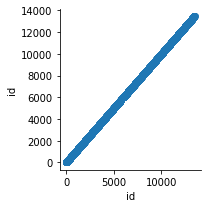

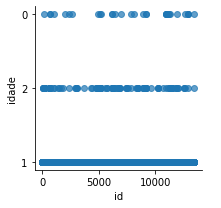

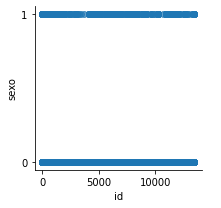

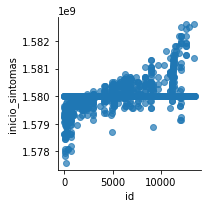

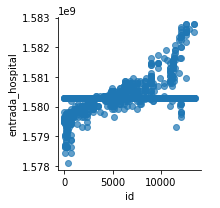

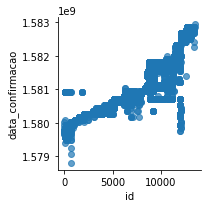

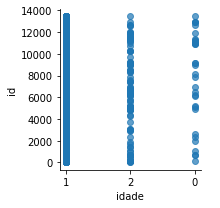

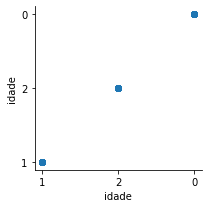

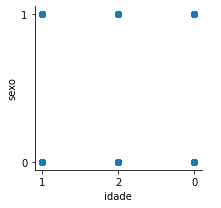

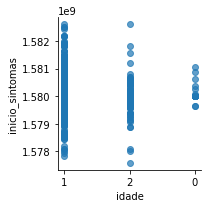

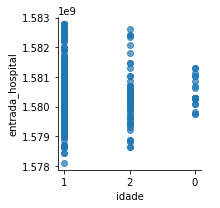

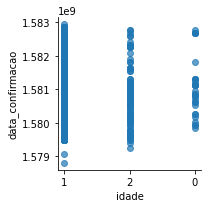

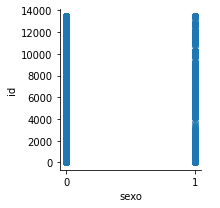

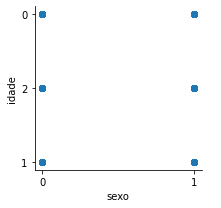

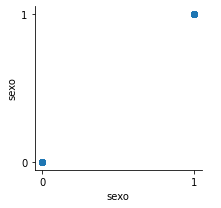

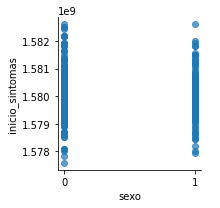

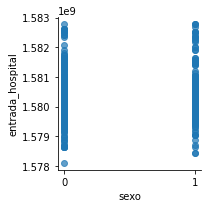

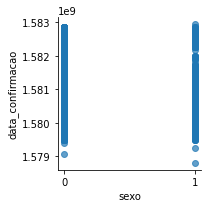

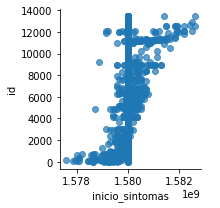

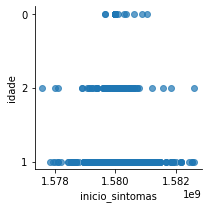

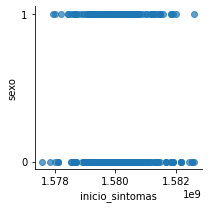

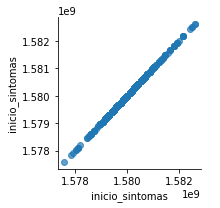

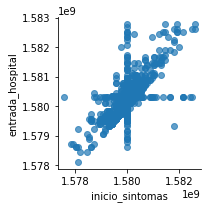

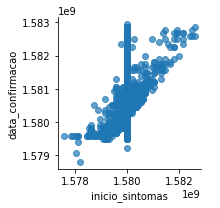

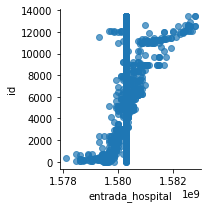

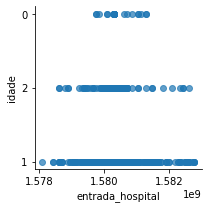

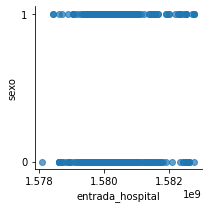

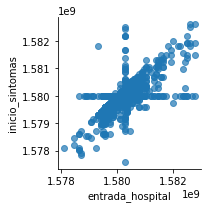

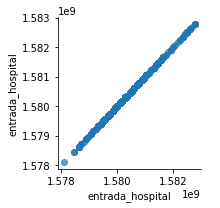

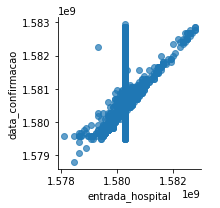

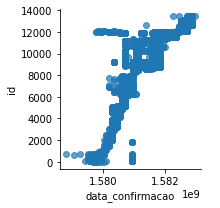

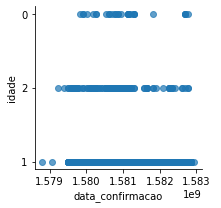

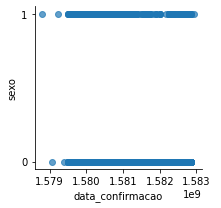

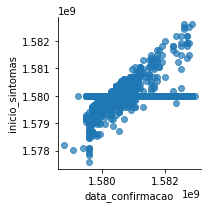

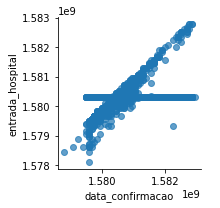

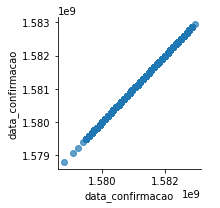

In [19]:
for atributo1 in corona.columns:
    for atributo2 in corona.columns:
        g = sns.FacetGrid(corona, margin_titles=True)
        g.map(plt.scatter, atributo1, atributo2, alpha=.7)
        g.add_legend()
        plt.show()

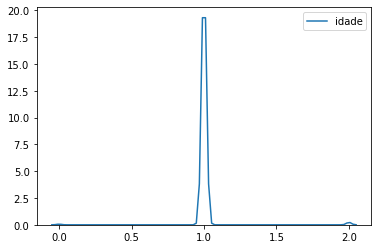

In [20]:
sns.kdeplot(corona.idade)

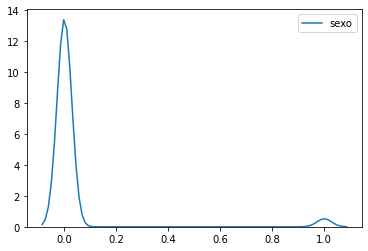

In [21]:
sns.kdeplot(corona.sexo)

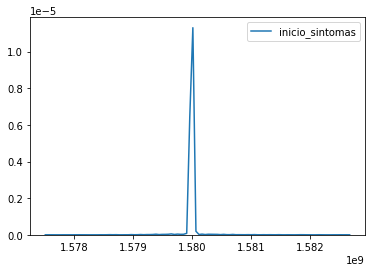

In [22]:
sns.kdeplot(corona.inicio_sintomas)

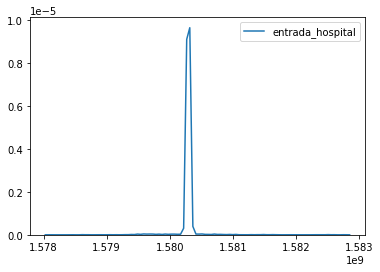

In [23]:
sns.kdeplot(corona.entrada_hospital)

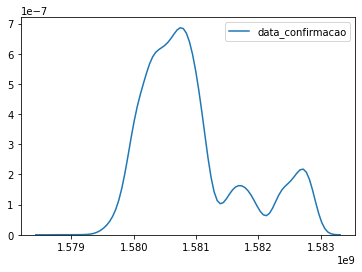

In [24]:
sns.kdeplot(corona.data_confirmacao)